In [194]:
### Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
### 1.	Let us begin with the basics. Create a vector with values 2002, 2004, 2006, 2008 using array() and range() functions.
v = np.array((2002, 2004, 2006, 2008))
print(v)
v = np.array(range(2002,2008+1, 2))
print(v)

[2002 2004 2006 2008]
[2002 2004 2006 2008]


In [144]:
### 2.	Use function len to get the size of the vector.
print(len(v))

4


In [145]:
### 3.	Try the different methods for selecting the elements of the vector.
print(v[1:])
print(v[2:4])
print(v[-1])
print(v[:3])

[2004 2006 2008]
[2006 2008]
2008
[2002 2004 2006]


In [146]:
### 4.	Load the data set usedcars.csv into a variable named df. It contains actual data about used cars advertised for sale on a popular U.S. website. Source: B. Lantz (2015). Machine Learning with R. Second edition. PACKT
### ----- FIRST SET WORKING DIRECTORY ----

df = pd.read_csv("usedcars.csv")

In [147]:
### 5.	Use info and describe methods on df. What types of variables are in the dataset? What are the average values of the numeric variables?
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


In [148]:
### 6.	Use tail and head functions on fdata.
print(df.head())
print(df.tail())

year model  price  mileage   color transmission
0  2011   SEL  21992     7413  Yellow         AUTO
1  2011   SEL  20995    10926    Gray         AUTO
2  2011   SEL  19995     7351  Silver         AUTO
3  2011   SEL  17809    11613    Gray         AUTO
4  2012    SE  17500     8367   White         AUTO
     year model  price  mileage   color transmission
145  2006   SES   6200    95000  Silver         AUTO
146  2002    SE   5995    87003     Red         AUTO
147  2000    SE   5980    96841     Red         AUTO
148  2001    SE   4899   151479  Yellow         AUTO
149  2000    SE   3800   109259     Red         AUTO


In [149]:
### 7.	Access the elements number 5 to 20 of variable color.
df['color'][5:21]

5     Silver
6       Blue
7     Silver
8     Silver
9     Silver
10     Black
11    Silver
12     Green
13       Red
14     White
15      Blue
16    Silver
17    Silver
18      Blue
19    Silver
20    Silver
Name: color, dtype: object

In [150]:
### 8.	Create a new dataset with only row numbers 10 and 100.
df2 = df.iloc[[10,100],1:3]

In [151]:
### 9.	Create a new dataset only with columns year, price and mileage.
df2 = df.iloc[:,[0,2,3]]
df2 = df.loc[:,["year","price","mileage"]]
print(df2)

year  price  mileage
0    2011  21992     7413
1    2011  20995    10926
2    2011  19995     7351
3    2011  17809    11613
4    2012  17500     8367
..    ...    ...      ...
145  2006   6200    95000
146  2002   5995    87003
147  2000   5980    96841
148  2001   4899   151479
149  2000   3800   109259

[150 rows x 3 columns]


In [152]:
### 10.	Obtain statistics for variables year and price.
####functions mean(), var(), quantile(), etc could also be used

df["year"].describe()
df["price"].describe()

count      150.000000
mean     12961.933333
std       3122.481735
min       3800.000000
25%      10995.000000
50%      13591.500000
75%      14904.500000
max      21992.000000
Name: price, dtype: float64

In [160]:
### 11.	Use method groupby() to calculate statistics filtering by classes.
[[transmission, subdf['price'].mean()] for transmission, subdf in df.groupby('transmission')]
[[transmission, subdf['price'].std()] for transmission, subdf in df.groupby('transmission')]
[[transmission, subdf['price'].describe()] for transmission, subdf in df.groupby('color')]

[['Black',
  count       35.000000
  mean     13314.828571
  std       2221.612179
  min       6950.000000
  25%      12778.500000
  50%      13950.000000
  75%      14719.000000
  max      16995.000000
  Name: price, dtype: float64],
 ['Blue',
  count       17.000000
  mean     13690.588235
  std       1932.175363
  min       9651.000000
  25%      12704.000000
  50%      13350.000000
  75%      15500.000000
  max      17000.000000
  Name: price, dtype: float64],
 ['Gold',
  count        1.0
  mean     10955.0
  std          NaN
  min      10955.0
  25%      10955.0
  50%      10955.0
  75%      10955.0
  max      10955.0
  Name: price, dtype: float64],
 ['Gray',
  count       16.000000
  mean     13665.500000
  std       3026.543044
  min       6980.000000
  25%      12867.750000
  50%      13535.500000
  75%      14532.500000
  max      20995.000000
  Name: price, dtype: float64],
 ['Green',
  count        5.000000
  mean     12110.000000
  std       3708.389947
  min       6980.000

In [191]:
### 12.	Filter from this dataset the rows that have a year that matches the values of the vector created in step 1.
df2 = df.loc[df['year'].isin(v)] 
df2
#### check if filter is correct
df2['year'].value_counts()

2008    14
2006     6
2004     3
2002     1
Name: year, dtype: int64

In [193]:
### 13.	Create a new column in the dataset named PM resulting from multiplying the values of price and mileage in each row.
df['PM'] = df['price'] * df['mileage']
df

,year,model,price,mileage,color,transmission,PM
0,2011,SEL,21992,7413,Yellow,AUTO,163026696
1,2011,SEL,20995,10926,Gray,AUTO,229391370
2,2011,SEL,19995,7351,Silver,AUTO,146983245
3,2011,SEL,17809,11613,Gray,AUTO,206815917
4,2012,SE,17500,8367,White,AUTO,146422500
...,...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO,589000000
146,2002,SE,5995,87003,Red,AUTO,521582985
147,2000,SE,5980,96841,Red,AUTO,579109180
148,2001,SE,4899,151479,Yellow,AUTO,742095621


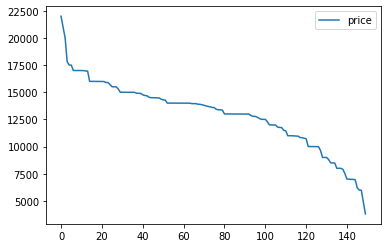

In [195]:
### 14.	Plot the price values with a solid line.
df.plot(kind = 'line', y = 'price')

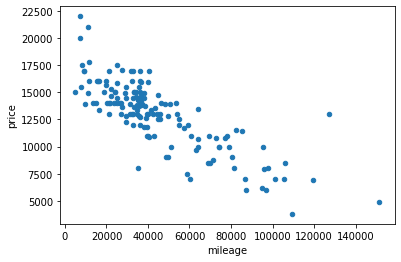

In [196]:
### 15.	Plot a scatterplot between variables mileage (x axis) and price (y axis).
df.plot(kind = "scatter",x = 'mileage', y = 'price')

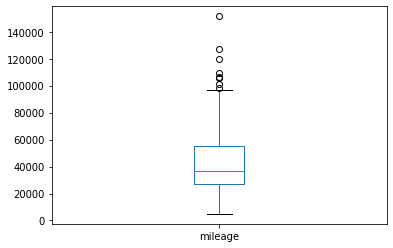

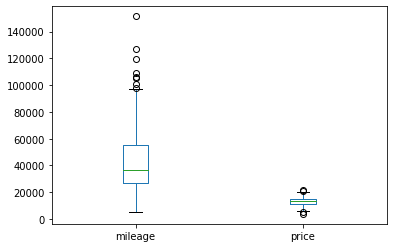

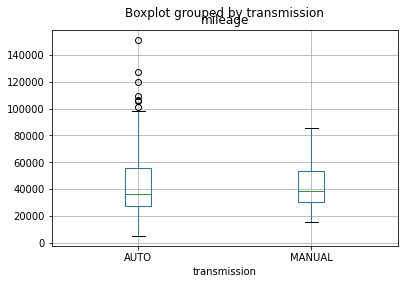

In [219]:
### 16.	Plot a boxplot of mileage values.
df.plot(kind = 'box', y = 'mileage')
####EXTRA: Plot a boxplot of mileage values and prices.
df.plot(kind = 'box', y = ['mileage','price'])
####EXTRA: Plot a boxplot of prices divided by classes in transmission.
df.boxplot(column = 'mileage', by = 'transmission')

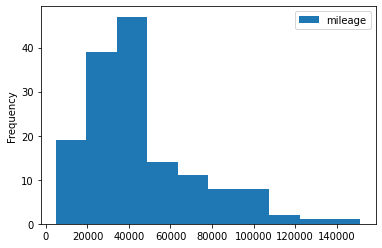

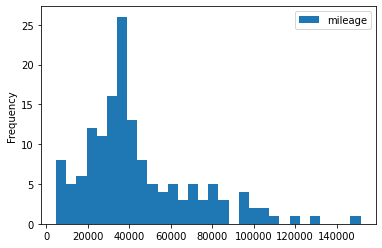

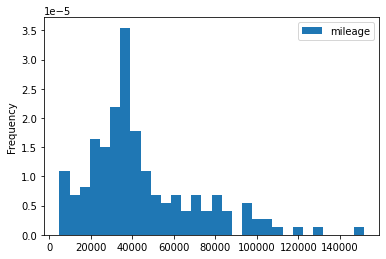

In [222]:
### 17.	Plot a histogram of the prices data. Can you change the number of bins? Can you plot the probability densities for each bar?
df.plot(kind = "hist", y = 'mileage')
df.plot(kind = "hist", y = 'mileage', bins = 30)
df.plot(kind = "hist", y = 'mileage', bins = 30, density = 1)